In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import pandas as pd
from  sdipylib.url import cache_url
pd.options.display.max_columns = 50
fn = cache_url('http://devtest.sandiegodata.org.s3.amazonaws.com/manifests/7a007ac7-960f-468b-8ce3-7b9f83e34ea8/hnr0914.csv')
df = pd.read_csv(fn)
CHPdf = pd.read_csv('CHPdata.csv')

#Hit & Run Analysis: Injury and Fatal Collisions

by the members of the San Diego Regional Data Library:
   - [Hila Hashemi](http://nbviewer.ipython.org/github/sdrdlanalysts/vosd-org-7-hitnrun/blob/master/analysts/hil-hnr.ipynb)
    - Analysis of Pleas (Not Guilty vs Bargains)
    - Geographical Sentencing Disparity Analysis.
    - Detailed analysis of sentences and incarcerations.
   - [Kevin Hung](http://nbviewer.ipython.org/github/sdrdlanalysts/vosd-org-7-hitnrun/blob/master/analysts/kev-hnr.ipynb) 
    - Barchart of Highest Charge frequency
    - Barcharts of Incarcerations by Year
    - Detailed analysis of sentences and incarcerations.
   - [Rajat Shah](http://nbviewer.ipython.org/github/sdrdlanalysts/vosd-org-7-hitnrun/blob/master/analysts/raj-hnr.ipynb)
    - Detailed analysis of sentences and incarcerations.
   - [Kenny Law](http://nbviewer.ipython.org/github/sdrdlanalysts/vosd-org-7-hitnrun/blob/master/analysts/ken-hnr.ipynb)
    - Barchart comparing Incarceration vs No Incarceration cases.
   - [Brian Whitaker](http://nbviewer.ipython.org/github/sdrdlanalysts/vosd-org-7-hitnrun/blob/master/analysts/bri-hnr.ipynb)
    - Statistics and analysis of sentences and incarcerations.

Report created by [Gonzalo Urrutia](http://nbviewer.ipython.org/github/sdrdlanalysts/vosd-org-7-hitnrun/blob/master/analysts/gon-hnr.ipynb)
    

## The Data Set

From the District Attorney's office (DA), a data set was put together that includes all the hit and run cases in San Diego County that were sentenced between 2009 and 2014. The datasets used in this analysis is [avaialble online.](http://devtest.sandiegodata.org.s3.amazonaws.com/manifests/7a007ac7-960f-468b-8ce3-7b9f83e34ea8/documentation.html)

From the California Highway Patrol, a summary of hit and run collisions between 2008 and 20012 was provided. 

### About the sample

The data set reflects only the highest charge sentenced.
The data set does not reflect:

- Which cases had victim injury or deaths.
- Hit and run cases where injury or death occured, but charges were filed as non-injury / non-fatal (eg: DUI, Reckless evading...)
- Defendant's previous record, which can influence the type and length of sentence as well as their elegibility for a bargain.

The data set does not include cases that do not make it to court (eg: suspect got away)

##2009-2012: A breakdown of all closed cases

In [51]:
df['final_disposition'] = df['final_disposition'].str.replace(',', '') #removing commas from strings for clarity\n"
df.final_disposition = df.final_disposition.fillna("No sentence yet") #blanks in final disposition are pending
dismissed = df['final_disposition'].str.contains("Dismissed")
nosentence = df['final_disposition'].str.contains("No sentence yet")
nocontest = df['final_disposition'].str.contains("No Contest Infraction")


remove = df[dismissed | nosentence | nocontest]
remove['remove']="yes"
df.remove=remove.remove

df=df[(df.complaint_year>=2009)&(df.complaint_year <= 2012)&(df.remove!="yes")]

df.sentencing = df.sentencing.fillna("")
county = df[df['sentencing'].str.contains("Local")]
prison = df[df['sentencing'].str.contains("Prison")]

#Plea Bargain
pleadguilty = df['final_disposition'].str.contains("Pled Guilty")
pleadguilty_inf = df['final_disposition'].str.contains("Pled Guilty Infraction")
pleadguilty_mis = df['final_disposition'].str.contains("Pled Guilty Misdemeanor")
pleadguilty_fel = df['final_disposition'].str.contains("Pled Guilty Felony")

#Pled Not Guilty
pleadnotguilty = df['final_disposition'].str.contains("Found")
notguilty =  df['final_disposition'].str.contains("Found Not Guilty")
guilty =  df['final_disposition'].str.contains("Found Guilty")
guilty_mis = df['final_disposition'].str.contains("Found Guilty Misdemeanor")
guilty_fel = df['final_disposition'].str.contains("Found Guilty Felony")

hnrsentences=pleadnotguilty.sum()+pleadguilty.sum()

print "Number of hit & runs sentenced =", hnrsentences
print "Defendant's Plea:"
print "  · Guilty (plea bargain) =", pleadguilty.sum()
print "      of an infraction =", pleadguilty_inf.sum()
print "      of a misdemeanor =", pleadguilty_mis.sum()
print "      of a felony =", pleadguilty_fel.sum()
print "  · Not Guilty =", pleadnotguilty.sum()
print "      and were found not guilty =", notguilty.sum()
print "      and were found guilty =", guilty.sum()
print "        of a misdemeanor =", guilty_mis.sum()
print "        of a felony =", guilty_fel.sum()


Number of hit & runs sentenced = 541
Defendant's Plea:
  · Guilty (plea bargain) = 527
      of an infraction = 1
      of a misdemeanor = 157
      of a felony = 369
  · Not Guilty = 14
      and were found not guilty = 1
      and were found guilty = 13
        of a misdemeanor = 1
        of a felony = 12


In [3]:
df

,id,division,district,highest_dispo_charge,last_event_result,number,highest_charge,highest_charge_mod,complaint_year,next_pending_event,offense_date,sentencing,final_disposition,unit,event_of_final_dispo,drug,drug_patient,drug_res,full,incar,incar_county,incar_life,incar_prison,incar_local,prob,prob_formal,prob_sum,prog,prog_child,prog_dv,work,work_furl,work_pub,work_vol
0,1,Superior Court,Central,VC23153(b),Evidentiary Hearing (Probation) - Admits - Rev...,CD218681,VC23153(a),alcohol,2009,NaN,2008-04-03 00:00:00.000000,Local Custody: 270 Days - Probation Formal: 5 ...,Pled Guilty Felony,Superior Court,Preliminary Exam Readiness,NaN,NaN,NaN,NaN,270,NaN,NaN,NaN,270,1825,1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Superior Court,Central,PC187(a),Felony Appeal by the Defense - Remittitur Issu...,CD218851,PC187(a),NaN,2009,NaN,2009-02-07 00:00:00.000000,Life: 20 Years,"Found Guilty, Felony",Superior Court,Felony Jury Trial,NaN,NaN,NaN,NaN,7300,NaN,7300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Superior Court,Central,VC20001(a),Sentencing Hearing - Probation Granted Formal,CD219041,VC20001(a),NaN,2009,NaN,2009-01-12 00:00:00.000000,Local Custody: 120 Days - Probation Formal: 3 ...,Pled Guilty Felony,Superior Court,Felony Readiness Conference,NaN,NaN,NaN,NaN,120,NaN,NaN,NaN,120,1095,1095,NaN,NaN,NaN,NaN,8.333333,NaN,NaN,8.333333
3,4,Superior Court,Central,VC20002(a),Further Proceedings - Action Taken,CD219048,VC20001(a),NaN,2009,NaN,2009-02-07 00:00:00.000000,Probation Summary: 3 Years,Pled Guilty Misdemeanor - Immediate Sentencing,Superior Court,Felony Readiness Conference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Superior Court,Central,VC20001(a),Sentencing Hearing - Probation Granted Summary,CD219101,VC20001(a),NaN,2009,NaN,2008-03-09 00:00:00.000000,Probation Summary: 3 Years,Pled Guilty Felony,Pre-Trial,Preliminary Exam Readiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Superior Court,Central,PC211,Sentencing Hearing - State Prison,CD219388,PC211,NaN,2009,NaN,2009-01-29 00:00:00.000000,State Prison: 2 Years,Pled Guilty Felony,Superior Court,Preliminary Exam Readiness,NaN,NaN,NaN,NaN,730,NaN,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Superior Court,Central,VC20001(a),Felony Other Motion Hearing - Granted,CD219660,VC20001(a),NaN,2009,NaN,2008-12-15 00:00:00.000000,Probation Summary: 3 Years,Pled Guilty Misdemeanor - Immediate Sentencing,Superior Court,Felony Readiness Conference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Superior Court,Central,"VC23153(a), alcohol",Further Proceedings - Action Taken,CD220506,VC20001(a),NaN,2009,NaN,2009-02-09 00:00:00.000000,Local Custody: 270 Days - Probation Formal: 5 ...,Pled Guilty Felony,Superior Court,Preliminary Exam Readiness,NaN,NaN,NaN,NaN,270,NaN,NaN,NaN,270,1825,1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Superior Court,Central,NaN,Affidavit Filed - Warrant Issued,CD220622,VC20001(a),NaN,2009,NaN,2008-04-04 00:00:00.000000,NaN,NaN,Pre-Trial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Superior Court,Central,"PC245(a)(1), deadly w",Probation Modification Hearing - Granted,CD220921,PC245(a)(1),deadly w,2009,NaN,2009-05-25 00:00:00.000000,Local Custody: 180 Days - Probation Formal: 3 ...,Pled Guilty Felony,Superior Court,Felony Readiness Conference,NaN,NaN,NaN,NaN,180,NaN,NaN,NaN,180,1095,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,# of Cases
Days Incarcerated,
0,159
1-120,97
+120,285


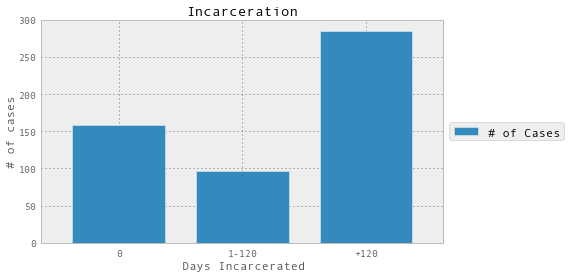

In [90]:
indexinc = ("0",
         "1-120",
         "+120") 
dfinc = pd.DataFrame({ 
'# of Cases': pd.Series((df.incar.isnull().sum(),
                        df.incar[(df.incar >= 1) & (df.incar <= 120)].count(),
                        df.incar[(df.incar > 120)].count() ), indexinc)}) 
dfinc.index.names = ['Days Incarcerated']
axinc=dfinc.plot(kind='bar', legend=True, title= "Incarceration") 
axinc.set_ylabel('# of cases')
axinc.set_xticklabels(dfinc.index, rotation='horizontal')

# Shrink current axis by %
box = axinc.get_position()
axinc.set_position([box.x0, box.y0, box.width * 1.2, box.height])

# Put a legend to the right of the current axis
axinc.legend(loc='center left', bbox_to_anchor=(1, 0.5))
dfinc

## Cases where highest charge involves injury and/or death

At the journalist request, we'll only look at the cases where the highest charge involves injury and fatality collisions. 
- VC20001: Duty to stop at an accident with injury or death
- PC192: Vehicular Manslaughter 
- PC191.5: Vehicular Manslaughter while Intoxicated
- PC187: Murder

This exploration does not include possible cases where the DA offers a non-related highest charge (eg: DUI).


,Cases w/ Incarceration,Cases w/ No Incarceration
Duty to stop accident w/ injury or death,114,95
Vehicular Manslaughter,1,1
Vehicular Manslaughter while Intoxicated,10,0
Murder,5,0


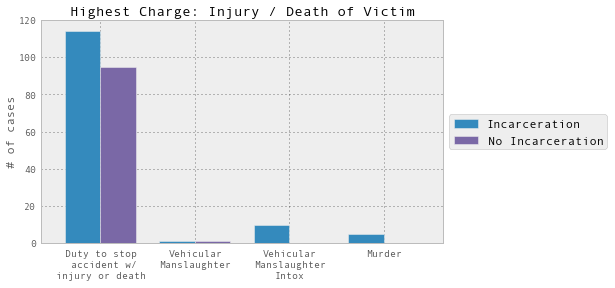

In [52]:
# VC20001 = Failing to Stop after an Accident (Injury or Death)
vc = df['highest_charge'].str.contains("VC20001")
vctot = len(df[vc])
vcnoinc = df[vc].incar.isnull().sum() 
vcinc = vctot-vcnoinc
vcincmean = df[vc].incar.mean()/30.4
vcprobmean = df[vc].prob.mean()/30.4

# PC192 = Vehicular Manslaughter
manslaughter = df['highest_charge'].str.contains("PC192")
manslaughtertot = len(df[manslaughter])
manslaughternoinc = df[manslaughter].incar.isnull().sum()
manslaughterinc = manslaughtertot - manslaughternoinc
manslaughterincmean = df[manslaughter].incar.mean()/30.4
manslaughterprobmean = df[manslaughter].prob.mean()/30.4

# PC191.5 = Vehicular Manslaughter (while intoxicated)
manslaughterdui = df['highest_charge'].str.contains("PC191")
manslaughterduitot = len(df[manslaughterdui])
manslaughterduinoinc = df[manslaughterdui].incar.isnull().sum()
manslaughterduiinc = manslaughterduitot - manslaughterduinoinc
manslaughterduiincmean = df[manslaughterdui].incar.mean()/30.4
manslaughterduiprobmean = df[manslaughterdui].prob.mean()/30.4

# PC187 = Murder 
murder = df['highest_charge'].str.contains("PC187")
murdertot= len(df[murder])
murdernoinc = df[murder].incar.isnull().sum()
murderinc = murdertot- murdernoinc
murderincmean = df[murder].incar.mean()/30.4
murderprobmean = df[murder].prob.mean()/30.4

index1 = ("Duty to stop \n accident w/\ninjury or death",
         "Vehicular\nManslaughter",
         "Vehicular\nManslaughter\nIntox",
         "Murder") 
df1 = pd.DataFrame({ 
'Incarceration': pd.Series((vcinc,manslaughterinc ,manslaughterduiinc,murderinc), index1),
'No Incarceration': pd.Series((vcnoinc,manslaughternoinc,manslaughterduinoinc,murdernoinc), index1)
}) 

ax1=df1.plot(kind='bar', legend=True, title= "Highest Charge: Injury / Death of Victim") 
ax1.set_ylabel('# of cases')
ax1.set_xticklabels(df1.index, rotation='horizontal')

# Shrink current axis by %
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.2, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

index2 = ("Duty to stop accident w/ injury or death",
         "Vehicular  Manslaughter",
         "Vehicular  Manslaughter while Intoxicated",
         "Murder") 
table1 = pd.DataFrame({ 
'Cases w/ Incarceration': pd.Series((vcinc,manslaughterinc ,manslaughterduiinc,murderinc), index2),
'Cases w/ No Incarceration': pd.Series((vcnoinc,manslaughternoinc,manslaughterduinoinc,murdernoinc), index2)
}) 
np.round(table1.fillna(0),1)

Considering the sentences that relate to injury and/or death of victim (PC191.5, PC192, PC187 and VC20001), the DA has prosecuted 226 cases. 

###Avg Length of Sentence
For cases where incarceration and/or probation was given, here are the avg length of sentences in months

,Avg Lenght of Probation (months),Avg Length of Incarceration (months)
Duty to stop accident w/ injury or death,39.6,10.9
Vehicular Manslaughter,36.0,52.0
Vehicular Manslaughter while Intoxicated,0.0,138.1
Murder,0.0,194.5


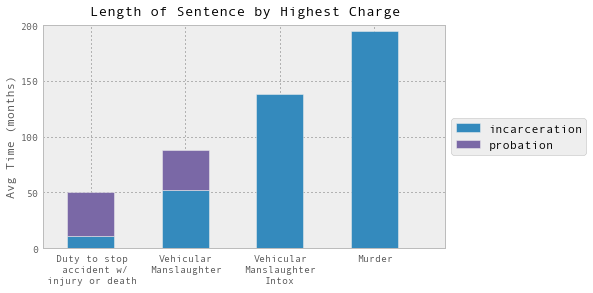

In [81]:
index2 = ("Duty to stop \n accident w/\ninjury or death",
         "Vehicular\nManslaughter",
         "Vehicular\nManslaughter\nIntox",
         "Murder") 
df2 = pd.DataFrame({ 
'incarceration': pd.Series((vcincmean,manslaughterincmean,manslaughterduiincmean,murderincmean), index2),
'probation': pd.Series((vcprobmean,manslaughterprobmean,manslaughterduiprobmean,murderprobmean), index2)
}) 

ax2=df2.plot(kind='bar',legend=True, stacked=True, title= "Length of Sentence by Highest Charge\n") 
ax2.set_ylabel('Avg Time (months)')
ax2.set_xticklabels(df2.index, rotation='horizontal')


# Shrink current axis by %
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 1.2, box.height])

# Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

index3 = ("Duty to stop accident w/ injury or death",
         "Vehicular Manslaughter",
         "Vehicular Manslaughter while Intoxicated",
         "Murder") 
table2 = pd.DataFrame({ 
'Avg Length of Incarceration (months)': pd.Series((vcincmean,manslaughterincmean,manslaughterduiincmean,murderincmean),index3),
'Avg Lenght of Probation (months)': pd.Series((vcprobmean,manslaughterprobmean,manslaughterduiprobmean,murderprobmean), index3)
}) 
np.round(table2.fillna(0),1)

##California Highway Patrol 
####Reported Hit and Runs

In [11]:
CHPdf=CHPdf[(CHPdf['Collision Year']>=2009)&(CHPdf['Collision Year']<= 2012)]

In [12]:
chpfatinjtot = CHPdf['Fatal Collisions'].sum()+CHPdf['Injury Collisions'].sum()
print "The CHP has reported",chpfatinjtot, "hit and runs that resulted in injury or death."

The CHP has reported 4099 hit and runs that resulted in injury or death.


# Requested Conclusions

- The court system brings to justice, under the appropriate highest charge, 6.3% of all reported hit and runs that result in injury or death of victim.
- 9 out of 10 cases are plea bargains to VC20001: Duty to Stop at Accident with Injury or Death.
- Incarceration: 
   - Out of the 241 cases, ~ half of the defendants get incarceration, and the other half doesn’t.
   - The avg length of incarceration for those who served is ~ 1 year.
   
###In other words
Out of the all the reported hit and runs resulting in injury or death in San Diego (2009-2012):
- 6 of 100 cases are sentenced with charges that relate to injury or death of victim 
  - With 3 out of 100 serving incarceration time; 
  - and the other 3, probation with no incarceration.

